## 유저별 클릭 분포

### Sampling

In [441]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format

In [3]:
pre_path = '../data/2.Preprocessed/'

In [4]:
users = pd.read_csv(pre_path+'accounts_preprocessed.csv')
clicks = pd.read_csv(pre_path+'click.csv')
orders = pd.read_csv(pre_path+'orders_only_in_clicks.csv')
products = pd.read_csv(pre_path+'products_preprocessed.csv')

<AxesSubplot:>

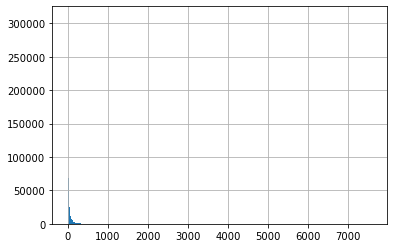

In [12]:
clicks.groupby(['account_id']).count()['request_date_time'].hist(bins=1000)

In [25]:
pop = clicks.groupby(['account_id']).count()['request_date_time'].reset_index()

In [38]:
pop = pop.sort_values('request_date_time', ascending=False).reset_index(drop=True)

In [51]:
pop.describe()

,account_id,request_date_time
count,7.970960e+05,797096.000000
mean,7.995727e+06,37.779141
std,5.174748e+06,85.434107
min,1.000040e+05,1.000000
25%,3.541426e+06,4.000000
50%,7.339854e+06,14.000000
75%,1.233223e+07,39.000000
max,1.696043e+07,7596.000000


In [424]:
acc_list = []
for i in range(1, 1001):
    if i < 2:
        mul = 200
        acc_list.append(pop['account_id'][i*mul])
    elif i <4:
        mul = 400
        acc_list.append(pop['account_id'][i*mul])
    else:
        mul = 780
        acc_list.append(pop['account_id'][i*mul])

In [305]:
clicks[clicks['account_id'].isin(acc_list)].groupby('account_id').count()['request_date_time'].describe()

count     99.000000
mean      38.787879
std       82.173196
min        1.000000
25%        4.500000
50%       14.000000
75%       38.000000
max      656.000000
Name: request_date_time, dtype: float64

<AxesSubplot:>

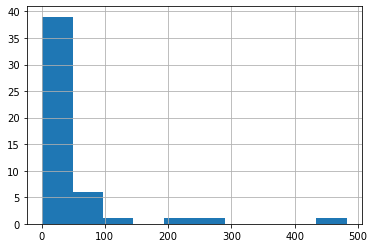

In [275]:
clicks[clicks['account_id'].isin(acc_list)].groupby('account_id').count()['request_date_time'].hist()

### Sample 1000(965)명에 대한 데이터 추출

In [427]:
sample_clicks = clicks[clicks['account_id'].isin(acc_list)]
sample_orders = orders[orders['account_id'].isin(acc_list)]
sample_users = users[users['account_id'].isin(acc_list)]

In [428]:
sample_pro = set.union(set(sample_clicks['product_id']), set(sample_orders['product_id']))

In [429]:
sample_products = products[products['product_id'].isin(sample_pro)]

In [430]:
sample_products

,product_id,product_name,published_at,maker_name,pub_0,pub_1,pub_2,pub_3,pub_4,category_id_01,...,category_id_28,category_id_29,category_id_30,category_id_31,category_id_33,category_id_34,shop_price_0,shop_price_1,shop_price_2,shop_price_3
27,43529739,2학년이 꼭 알아야할 사고력 연산,2017-07-03 00:00:00,에듀왕(왕수학),0,0,0,0,1,0,...,0,1,0,0,0,0,0,1,0,0
322,43605328,왜 출근하는가,2017-07-10 00:00:00,21세기북스,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
351,43606477,너무 재미있어서 웃음 빵 터지는 저학년 수수께끼,2017-06-28 00:00:00,키움,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
647,43632073,"초등 영어, 구문이 독해다 초등 READing 1",2017-07-13 00:00:00,키출판사,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
681,43632584,초등 첫 영문법 문법이 쓰기다 Starter 1,2017-07-13 00:00:00,키출판사,0,0,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1673510,85350195,흉악범과의 면담 3,2020-01-02 00:00:00,손봄북스,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1673516,85350206,흔한남매 3,2020-01-09 00:00:00,미래엔아이세움,0,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
1673521,85351966,디어 마이 트래블 (dear my travel),2019-12-30 00:00:00,두사람,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1673524,85352226,동물귀 의인화 캐릭터 북,2019-12-24 00:00:00,한스미디어,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


### sample 과 population의 분포 비교

In [432]:
sample_users

,account_id,last_login_dts,gender_M,gender_F,address_is_0,address_is_1,age_0,age_1,age_2,age_3,age_4,age_5,age_6
77,206719,2019-06-04 12:23:43.000000000,1,0,1,0,0,0,0,0,0,1,0
459,706358,2019-10-10 15:16:28.000000000,0,1,0,1,0,0,0,0,0,1,0
928,1413936,2020-05-01 06:15:24.000000000,0,1,0,1,0,0,0,0,0,1,0
984,1489994,2019-11-25 06:41:42.000000000,0,1,1,0,0,0,0,1,0,0,0
1870,3280921,2020-04-06 10:14:10.000000000,1,0,0,1,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1660986,677231,2020-05-19 00:31:03.000000000,0,1,0,1,0,0,0,0,0,1,0
1661664,1687989,2020-01-19 16:32:25.000000000,0,1,0,1,0,0,0,1,0,0,0
1665002,7878461,2020-01-13 05:11:30.000000000,0,1,0,1,0,0,0,0,1,0,0
1666893,12290272,2020-06-05 00:12:49.000000000,1,0,0,1,0,0,0,0,1,0,0


In [435]:
sample_users.describe()

,account_id,gender_M,gender_F,address_is_0,address_is_1,age_0,age_1,age_2,age_3,age_4,age_5,age_6
count,9.650000e+02,965.000000,965.000000,965.000000,965.000000,965.0,965.000000,965.000000,965.000000,965.000000,965.000000,965.000000
mean,7.922646e+06,0.350259,0.649741,0.224870,0.775130,0.0,0.025907,0.233161,0.288083,0.338860,0.103627,0.010363
std,5.165188e+06,0.477298,0.477298,0.417713,0.417713,0.0,0.158939,0.423063,0.453105,0.473568,0.304934,0.101321
min,1.057290e+05,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.526768e+06,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,7.735908e+06,0.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.231160e+07,1.000000,1.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000
max,1.695512e+07,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
click_user = pd.merge(clicks.iloc[:, :3], users, how='left', on='account_id')

In [442]:
click_user.describe()

,account_id,product_id,gender_M,gender_F,address_is_0,address_is_1,age_0,age_1,age_2,age_3,age_4,age_5,age_6
count,30113602.00,30113602.00,29238423.00,29238423.00,29238423.00,29238423.00,29238423.00,29238423.00,29238423.00,29238423.00,29238423.00,29238423.00,29238423.00
mean,6329494.15,57355855.62,0.29,0.71,0.24,0.76,0.00,0.02,0.13,0.34,0.40,0.11,0.01
std,4715958.89,30860516.76,0.45,0.45,0.43,0.43,0.01,0.13,0.34,0.47,0.49,0.31,0.10
min,100004.00,5.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2384655.00,29288225.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,5263363.00,68783829.00,0.00,1.00,0.00,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,9849593.00,84817526.00,1.00,1.00,0.00,1.00,0.00,0.00,0.00,1.00,1.00,0.00,0.00
max,16960430.00,90410473.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [458]:
sample_path = '../data/5.sampled/'
fed_path = '../data/4.Merged/'

In [459]:
fed_users = pd.read_csv(fed_path + 'fed_users.csv')
fed_products = pd.read_csv(fed_path + 'fed_products.csv')

In [754]:
sample_users = fed_users[fed_users['account_id'].isin(acc_list)]
sample_products = fed_products[fed_products['product_id'].isin(sample_pro)]

In [755]:
sample_users.to_csv(sample_path + 'sampled_users.csv', index=None)
sample_products.to_csv(sample_path + 'sampled_products.csv', index=None)
sample_orders.to_csv(sample_path + 'sampled_orders.csv', index=None)
sample_clicks.to_csv(sample_path + 'sampled_clicks.csv', index=None)

## 차원축소

In [671]:
from prince import FAMD
from scipy import stats

In [792]:
sample_users = pd.read_csv(sample_path+'sampled_users.csv')

In [793]:
gen_col = [col for col in sample_users.columns if col.startswith('gender')]
add_col = [col for col in sample_users.columns if col.startswith('add')]
age_col = [col for col in sample_users.columns if col.startswith('age')]
#cat_col = [col for col in sample_users.columns if col.startswith('category')]

In [794]:
sample_users['gender'] = sample_users[gen_col].idxmax(axis=1).str[-1]
sample_users['address_is'] = sample_users[add_col].idxmax(axis=1).str[-1]
sample_users['age'] = sample_users[age_col].idxmax(axis=1).str[-1]
#sample_users['category'] = sample_users[cat_col].idxmax(axis=1).str[-2:]

In [675]:
#sample_users.drop(gen_col+add_col+age_col, axis=1, inplace=True)

In [795]:
sample_users.dropna(inplace=True)

In [796]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
sc = StandardScaler()
msc = MinMaxScaler()

In [797]:
flo_col = [col for col in sample_users.columns if sample_users[col].dtype == float]

In [798]:
sample_users[flo_col] = msc.fit_transform(sample_users[flo_col])

In [799]:
famd = FAMD(n_components=5, n_iter=3, random_state=1)

In [800]:
famd.fit(sample_users.drop(columns=gen_col+add_col+age_col+['account_id', 'last_login_dts'], axis=1))

FAMD(n_components=5, random_state=1)

In [801]:
users_features = famd.transform(sample_users.drop(columns=gen_col+add_col+age_col+['account_id', 'last_login_dts'], axis=1))

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (8.08% inertia)', ylabel='Component 1 (6.56% inertia)'>

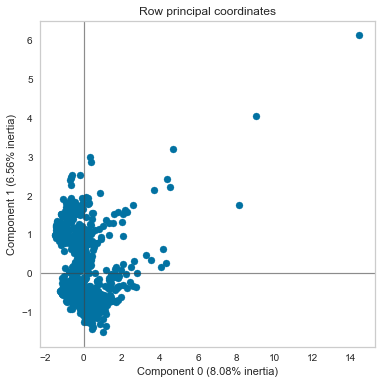

In [803]:
famd.plot_row_coordinates(sample_users)

In [804]:
famd.partial_row_coordinates(sample_users)

Categorical                                     Numerical              \
              0        1        2        3        4         0     1     2   
0       -479.19  2673.85  2057.24   839.42 -1777.39     -0.50  0.34  0.20   
1        160.00 -1539.22 -1655.04  -987.68  1045.83     -0.80 -0.38  0.16   
2        160.00 -1539.22 -1655.04  -987.68  1045.83      0.25 -0.67  0.42   
3       1214.34 -2641.84   226.27  1949.51 -2227.41      1.27 -0.49  0.45   
4        246.08  1850.43 -2828.77 -1396.71 -1368.88     -0.66  0.28  0.26   
..          ...      ...      ...      ...      ...       ...   ...   ...   
960      160.00 -1539.22 -1655.04  -987.68  1045.83     -0.18  0.66  0.03   
961     1049.81 -2502.24 -3157.39  -637.15  -386.54      0.06  0.37 -0.02   
962      700.97 -2605.94  -312.75 -2467.79  2291.07      1.18  0.09  0.03   
963     -102.75  1746.72    15.88 -3227.35  1308.72      1.14 -0.18  0.03   
964    -1409.87  2429.85 -1962.29  -121.70  1632.83     -0.96 -0.46  0.69   

                 
        3     4  
0   -0.31 -0.64  
1   -0.51 -0.79  
2   -0.63 -0.38  
3   -0.25 -0.20  
4   -0.59 -0.62  
..    ...   ...  
960 -0.11 -0.52  
961 -0.21  0.06  
962  0.16  0.38  
963 -0.10  0.03  
964 -0.57  0.61  

[962 rows x 10 columns]

In [805]:
famd.explained_inertia_

array([0.08083835, 0.06555506, 0.06008345, 0.05095656, 0.04996596])

In [806]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

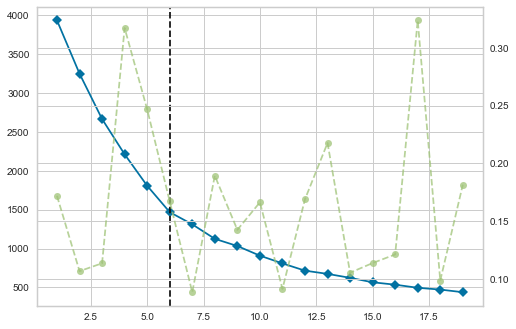

In [807]:
model_users = KMeans()
visualizer = KElbowVisualizer(model_users, k=(1, 20), locate_elbow=True)
res = visualizer.fit(users_features)

In [816]:
model_users = KMeans(n_clusters=5, algorithm='auto')
model_users.fit(users_features)

KMeans(n_clusters=5)

In [817]:
sample_users['cluster'] = model_users.predict(users_features)

In [818]:
sample_users.groupby('cluster').mean().T
#0 : 취준 20대 / 1: 중고등학생 학부모 / 2: 30대 주부 / 3: 3-50대 남성, 경제경영 / 4: 30대 관여도 높은, 가정을 꾸리는 초반단계

cluster,0,1,2,3,4
account_id,6673477.92,6740261.50,12153741.18,4102239.67,6743608.86
gender_M,0.85,0.00,0.34,0.50,0.03
gender_F,0.15,1.00,0.66,0.50,0.97
address_is_0,0.23,0.26,0.21,0.50,0.18
address_is_1,0.77,0.74,0.79,0.50,0.82
age_0,0.00,0.00,0.00,0.00,0.00
age_1,0.03,0.06,0.01,0.00,0.00
age_2,0.02,0.00,0.99,0.00,0.00
age_3,0.25,0.00,0.00,0.58,1.00
age_4,0.34,0.93,0.00,0.33,0.00


In [812]:
sample_users.groupby('cluster').agg(lambda x: stats.mode(x)[0][0])

,account_id,last_login_dts,gender_M,gender_F,address_is_0,address_is_1,age_0,age_1,age_2,age_3,...,category_id_28,category_id_29,category_id_30,category_id_31,category_id_33,category_id_34,involvement,gender,address_is,age
cluster,,,,,,,,,,,,,,,,,,,,,
0,139707,2019-07-09 23:41:42.000000000,0,1,0,1,0,0,0,1,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,F,1,3
1,963281,2019-11-05 12:40:02.000000000,1,0,1,0,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,M,0,2
2,194724,2019-10-20 08:34:48.000000000,0,1,0,1,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.02,F,1,4
3,111175,2019-09-24 00:51:28.000000000,1,0,0,1,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,M,1,4
4,432027,2019-07-16 02:17:29.000000000,0,1,1,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,F,0,4
5,1168004,2020-03-14 13:13:55.000000000,0,0,0,1,0,0,0,1,...,0.00,0.00,0.00,0.00,0.03,0.04,0.07,F,1,3
6,3246522,2019-09-03 04:58:19.000000000,1,0,0,1,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,M,1,2
7,105729,2019-12-03 09:24:16.000000000,1,0,1,0,0,0,0,0,...,0.00,0.00,0.00,0.00,0.02,0.01,0.04,M,0,4
8,4010001,2019-06-27 08:14:05.000000000,0,1,0,1,0,0,1,0,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,F,1,2


<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (8.08% inertia)', ylabel='Component 1 (6.56% inertia)'>

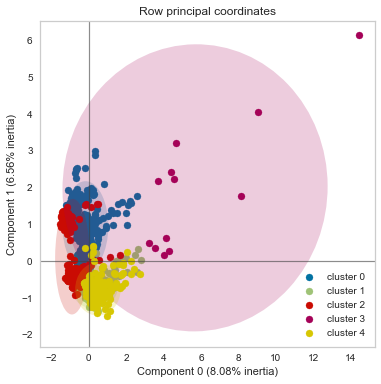

In [819]:
famd.plot_row_coordinates(sample_users, color_labels=['cluster {}'.format(c) for c in sample_users['cluster']])

<AxesSubplot:title={'center':'Partial row principal coordinates'}, xlabel='Component 0 (8.08% inertia)', ylabel='Component 1 (6.56% inertia)'>

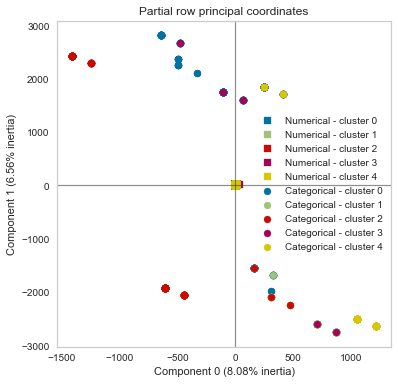

In [820]:
famd.plot_partial_row_coordinates(sample_users, color_labels=['cluster {}'.format(c) for c in sample_users['cluster']])

In [760]:
pri_col = [col for col in sample_products.columns if col.startswith('shop')]
pub_col = [col for col in sample_products.columns if col.startswith('pub_')]

In [762]:
sample_products['category_id'] = sample_products[cat_col].idxmax(axis=1).str[-2:]
sample_products['pub'] = sample_products[pub_col].idxmax(axis=1).str[-1]
sample_products['price'] = sample_products[pri_col].idxmax(axis=1).str[-1]

/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_53346/933796025.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_products['category_id'] = sample_products[cat_col].idxmax(axis=1).str[-2:]
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_53346/933796025.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_products['pub'] = sample_products[pub_col].idxmax(axis=1).str[-1]
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_53346/933796025.py:3: SettingWithCopyWarning

In [766]:
sample_products['best200'] = sample_products['best200'].astype(str)
sample_products['bestcat24'] = sample_products['bestcat24'].astype(str)
sample_products['pub'] = sample_products['pub'].astype(int)
sample_products['price'] = sample_products['price'].astype(int)

/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_53346/1429786442.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_products['best200'] = sample_products['best200'].astype(str)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_53346/1429786442.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_products['bestcat24'] = sample_products['bestcat24'].astype(str)
/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_53346/1429786442.py:3: SettingWithCopyWarning: 
A value i

In [769]:
famd = FAMD(n_components=5, n_iter=3, random_state=1)
famd.fit(sample_products.iloc[:, -5:])
book_features = famd.transform(sample_products.iloc[:, -5:])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (8.16% inertia)', ylabel='Component 1 (6.78% inertia)'>

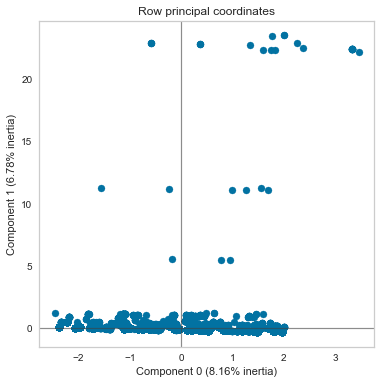

In [772]:
famd.plot_row_coordinates(sample_products)

In [773]:
famd.partial_row_coordinates(sample_products)

Categorical                                      Numerical             \
                  0        1         2        3        4         0     1    2   
27         -2133.46 -2515.81 -16145.23  4451.70 14577.88     -1.43  0.01 0.01   
322          632.93 -2862.52 -16311.19 -1149.65 -1966.82      0.49 -0.13 0.01   
351        -3753.87 -2344.81 -17193.99  6658.57  2142.82     -1.43  0.01 0.01   
647        -2133.46 -2515.81 -16145.23  4451.70 14577.88      0.49 -0.13 0.01   
681        -2133.46 -2515.81 -16145.23  4451.70 14577.88      0.49 -0.13 0.01   
...             ...      ...       ...      ...      ...       ...   ...  ...   
1673510    -4502.71 -2413.59 -17748.76 -4305.93 -1086.02      0.49 -0.13 0.01   
1673516    -3892.46  2840.66  16267.07  4588.95  2133.35     -1.43  0.01 0.01   
1673521      232.20 -2658.60 -16409.60   505.75    11.12      0.49 -0.13 0.01   
1673524    -4502.71 -2413.59 -17748.76 -4305.93 -1086.02      0.49 -0.13 0.01   
1673528    -3753.87 -2344.81 -17193.99  6658.57  2142.82     -1.43  0.01 0.01   

                     
            3     4  
27      -0.03  0.02  
322      0.01 -0.01  
351     -0.03  0.02  
647      0.01 -0.01  
681      0.01 -0.01  
...       ...   ...  
1673510  0.01 -0.01  
1673516 -0.03  0.02  
1673521  0.01 -0.01  
1673524  0.01 -0.01  
1673528 -0.03  0.02  

[14679 rows x 10 columns]

In [774]:
famd.explained_inertia_

array([0.0815542 , 0.06780567, 0.0544654 , 0.03411241, 0.03338404])

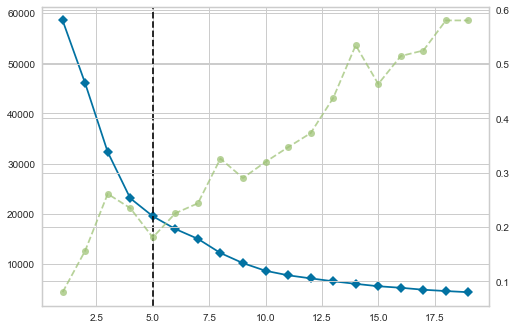

In [775]:
model_books = KMeans()
visualizer = KElbowVisualizer(model_books, k=(1, 20), locate_elbow=True)
res = visualizer.fit(book_features)

In [781]:
model_book = KMeans(n_clusters=6, algorithm='auto')
model_book.fit(book_features)
sample_products['cluster'] = model_book.predict(book_features)

/var/folders/hr/gb6mblx17c92hbbhpn97s24m0000gn/T/ipykernel_53346/3650315384.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sample_products['cluster'] = model_book.predict(book_features)


In [782]:
sample_products.groupby('cluster').mean().T

cluster,0,1,2,3,4,5
product_id,58438417.30,53576595.84,42924126.40,81123443.22,65153681.53,55887464.02
pub_0,0.00,0.00,0.00,0.81,0.00,0.00
pub_1,0.00,0.00,0.00,0.00,0.00,0.00
pub_2,0.00,0.00,0.00,0.19,0.00,0.00
pub_3,0.00,0.00,0.00,0.00,0.00,0.00
pub_4,1.00,1.00,1.00,0.00,1.00,1.00
category_id_01,0.00,0.14,0.03,0.38,0.04,0.00
category_id_02,0.00,0.05,0.00,0.03,0.03,0.00
category_id_03,0.30,0.00,0.02,0.03,0.10,0.00
category_id_04,0.00,0.10,0.00,0.00,0.04,0.00


In [695]:
sample_users.groupby('cluster').agg(lambda x: stats.mode(x)[0][0])

,account_id,last_login_dts,new_preference,click_time_day,click_time_night,weekend_0,weekend_1,day_ratio,weekend_ratio,category_id_01,...,category_id_28,category_id_29,category_id_30,category_id_31,category_id_33,category_id_34,involvement,gender,address_is,age
cluster,,,,,,,,,,,,,,,,,,,,,
0,3246522,2019-06-27 08:14:05.000000000,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.01,F,1,2
1,115904,2019-07-09 23:41:42.000000000,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,F,1,3
2,168755,2019-05-18 18:47:39.000000000,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,F,0,4
3,148006,2019-07-02 05:46:01.000000000,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,F,1,4
4,111175,2019-05-11 08:32:58.000000000,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,M,1,4
5,105729,2019-10-20 08:34:48.000000000,0.00,0.09,0.03,0.10,0.04,0.28,0.01,0.00,...,0.00,0.00,0.00,0.00,0.01,0.00,0.04,F,0,3


<AxesSubplot:title={'center':'Row principal coordinates'}, xlabel='Component 0 (8.16% inertia)', ylabel='Component 1 (6.78% inertia)'>

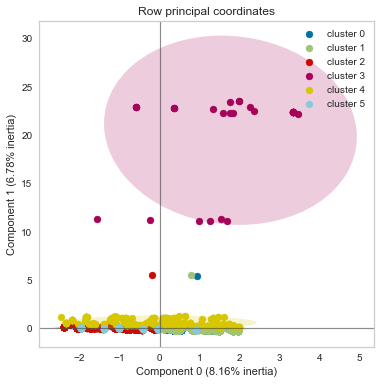

In [783]:
famd.plot_row_coordinates(sample_products, color_labels=['cluster {}'.format(c) for c in sample_products['cluster']])

<AxesSubplot:title={'center':'Partial row principal coordinates'}, xlabel='Component 0 (8.16% inertia)', ylabel='Component 1 (6.78% inertia)'>

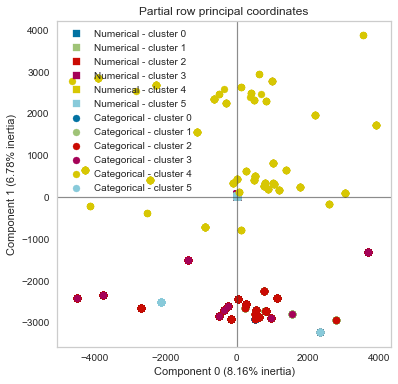

In [784]:
famd.plot_partial_row_coordinates(sample_products, color_labels=['cluster {}'.format(c) for c in sample_products['cluster']])

In [787]:
kmean_products = pd.concat([sample_products[['product_id', 'cluster']], book_features], axis=1)

In [822]:
kmean_users = pd.concat([sample_users[['account_id', 'cluster']], users_features], axis=1)

In [825]:
kmean_products

,product_id,cluster,0,1,2,3,4
27,43529739,5,-1.01,-0.01,-0.07,0.44,1.95
322,43605328,1,0.36,-0.14,-0.06,-0.44,-0.41
351,43606477,2,-1.05,0.00,-0.19,0.49,0.20
647,43632073,5,-0.04,-0.08,-0.07,0.46,1.93
681,43632584,5,-0.04,-0.08,-0.07,0.46,1.93
...,...,...,...,...,...,...,...
1673510,85350195,2,-0.45,-0.06,-0.30,-0.81,-0.17
1673516,85350206,4,-1.15,1.14,6.89,0.79,0.23
1673521,85351966,1,0.46,-0.17,0.26,-0.67,0.00
1673524,85352226,2,-0.45,-0.06,-0.30,-0.81,-0.17


In [829]:
k_mean_path = '../data/6.K-mean/'

In [834]:
sample_products.drop(['category_id', 'pub', 'price'], axis=1, inplace=True)
sample_products.to_csv(k_mean_path + 'kmeans_product_onehotcol.csv', index=None)

In [833]:
sample_users.drop(['gender', 'address_is', 'age'], axis=1, inplace=True)
sample_users.to_csv(k_mean_path + 'kmeans_user_onehotcol.csv', index=None)

In [836]:
sample_products['cluster'].nunique()

6